In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt 

In [4]:
import seaborn as sns 

In [5]:
path="G:/python data analysis/exercise 2/movielens1Mdataset/users.dat"
name_user=["user_id","gender","age","occupation","zip"]
data_user=pd.read_table(path, sep="::",header=None,names=name_user,engine="python")


In [6]:
data_user.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
path="G:/python data analysis/exercise 2/movielens1Mdataset/ratings.dat"
name_ratings=["user_id","movie_id","rating","timestamp"]
data_rating=pd.read_table(path, sep="::",header=None,names=name_ratings,engine="python")


In [8]:
data_rating.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
path = "G:/python data analysis/exercise 2/movielens1Mdataset/movies.dat"
name_movies = ["movie_id", "title", "genres"]
movies_user = pd.read_table(path, sep="::", header=None, names=name_movies, engine="python", encoding="ISO-8859-1")

In [10]:
movies_user.head(5)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
data_rating

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [12]:
merged_data = pd.merge(pd.merge(data_rating, data_user, on='user_id'), movies_user, on='movie_id')


In [13]:
merged_data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [14]:
merged_data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [15]:
mean_data=merged_data.pivot_table("rating",index="title",columns="gender",aggfunc="mean")

In [16]:
mean_data

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000


In [17]:
mean_data.head(5)

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [18]:
ratings_by_title=merged_data.groupby("title").size()

In [19]:
ratings_by_title

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64

In [20]:
most_rated_movie_title = ratings_by_title.idxmax()

In [21]:
most_rated_movie_title

'American Beauty (1999)'

In [22]:
highest_number_of_ratings = ratings_by_title.max()

In [23]:
highest_number_of_ratings

3428

In [24]:
# Series to include only those movie titles that have received 250 or more ratings
active_title=ratings_by_title.index[ratings_by_title>=250]

In [25]:
active_title

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [26]:
user_ids_for_american_beauty = merged_data.loc[merged_data['title'] == 'American Beauty (1999)', 'user_id']
user_ids_for_american_beauty


107009       2
107010       3
107011       5
107012       6
107013       8
          ... 
110432    6019
110433    6027
110434    6036
110435    6037
110436    6040
Name: user_id, Length: 3428, dtype: int64

In [27]:
total_ratings_for_american_beauty = (merged_data['title'] == 'American Beauty (1999)').sum()
total_ratings_for_american_beauty

3428

In [28]:
mean_data=mean_data.loc[active_title]

In [29]:
mean_data

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


In [30]:
Top_female_viewer=mean_data.sort_values("F",ascending=False)

In [31]:
Top_female_viewer

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
...,...,...
"Avengers, The (1998)",1.915254,2.017467
Speed 2: Cruise Control (1997),1.906667,1.863014
Rocky V (1990),1.878788,2.132780


In [32]:
# Assuming you have columns named 'mean_rating_male' and 'mean_rating_female'
mean_data['diff'] = mean_data['M'] - mean_data['F']

# Sort by the difference
sorted_by_diff = mean_data.sort_values("diff")


In [33]:
sorted_by_diff

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
...,...,...,...
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608


In [34]:
sorted_by_diff[::-1].head()

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787


In [35]:
rating_std_by_title=merged_data.groupby("title")["rating"].std()

In [36]:
rating_std_by_title

title
$1,000,000 Duck (1971)                        1.092563
'Night Mother (1986)                          1.118636
'Til There Was You (1997)                     1.020159
'burbs, The (1989)                            1.107760
...And Justice for All (1979)                 0.878110
                                                ...   
Zed & Two Noughts, A (1985)                   1.052794
Zero Effect (1998)                            1.042932
Zero Kelvin (Kjærlighetens kjøtere) (1995)    0.707107
Zeus and Roxanne (1997)                       1.122884
eXistenZ (1999)                               1.178568
Name: rating, Length: 3706, dtype: float64

In [37]:
rating_std_by_title=rating_std_by_title.loc[active_title]

In [38]:
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

In [39]:
movies_user["genres"]=movies_user["genres"].map(lambda word:word.split("|") if isinstance(word,str) else word)

In [40]:
explode_movies=movies_user.explode("genres")
explode_movies[:10]

,movie_id,title,genres
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children's
0,1,Toy Story (1995),Comedy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children's
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance
3,4,Waiting to Exhale (1995),Comedy
3,4,Waiting to Exhale (1995),Drama


In [41]:
ratings_by_genre = pd.merge(pd.merge(explode_movies, data_rating, on='movie_id'), data_user, on='user_id')


In [42]:
ratings_by_genre

,movie_id,title,genres,user_id,rating,timestamp,gender,age,occupation,zip
0,1,Toy Story (1995),Animation,1,5,978824268,F,1,10,48067
1,1,Toy Story (1995),Children's,1,5,978824268,F,1,10,48067
2,1,Toy Story (1995),Comedy,1,5,978824268,F,1,10,48067
3,48,Pocahontas (1995),Animation,1,5,978824351,F,1,10,48067
4,48,Pocahontas (1995),Children's,1,5,978824351,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
2101810,3536,Keeping the Faith (2000),Romance,5727,5,958489902,M,25,4,92843
2101811,3555,U-571 (2000),Action,5727,3,958490699,M,25,4,92843
2101812,3555,U-571 (2000),Thriller,5727,3,958490699,M,25,4,92843
2101813,3578,Gladiator (2000),Action,5727,5,958490171,M,25,4,92843


In [43]:
ratings_by_genre.iloc[0]

movie_id                     1
title         Toy Story (1995)
genres               Animation
user_id                      1
rating                       5
timestamp            978824268
gender                       F
age                          1
occupation                  10
zip                      48067
Name: 0, dtype: object

In [44]:
each_genre_rating=(ratings_by_genre.groupby(["genres","age"])["rating"].mean().unstack("age"))

In [45]:
each_genre_rating

age,1,18,25,35,45,50,56
genres,,,,,,,
Action,3.506385,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.449975,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.476113,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.241642,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.497491,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.710170,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.730769,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.794735,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.317647,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


In [46]:
each_genre_ratings_top10 = each_genre_rating.loc[:,18:56]

In [47]:
each_genre_ratings_top10

age,18,25,35,45,50,56
genres,,,,,,
Action,3.447097,3.453358,3.538107,3.528543,3.611333,3.610709
Adventure,3.408525,3.443163,3.515291,3.528963,3.628163,3.649064
Animation,3.624014,3.701228,3.740545,3.734856,3.780020,3.756233
Children's,3.294257,3.426873,3.518423,3.527593,3.556555,3.621822
Comedy,3.460417,3.490385,3.561984,3.591789,3.646868,3.650949
Crime,3.668054,3.680321,3.733736,3.750661,3.810688,3.832549
Documentary,3.865865,3.946690,3.953747,3.966521,3.908108,3.961538
Drama,3.721930,3.726428,3.782512,3.784356,3.878415,3.933465
Fantasy,3.353778,3.452484,3.482301,3.532468,3.581570,3.532700


<Axes: title={'center': 'rating according to age perspective to genre'}, xlabel='genres'>

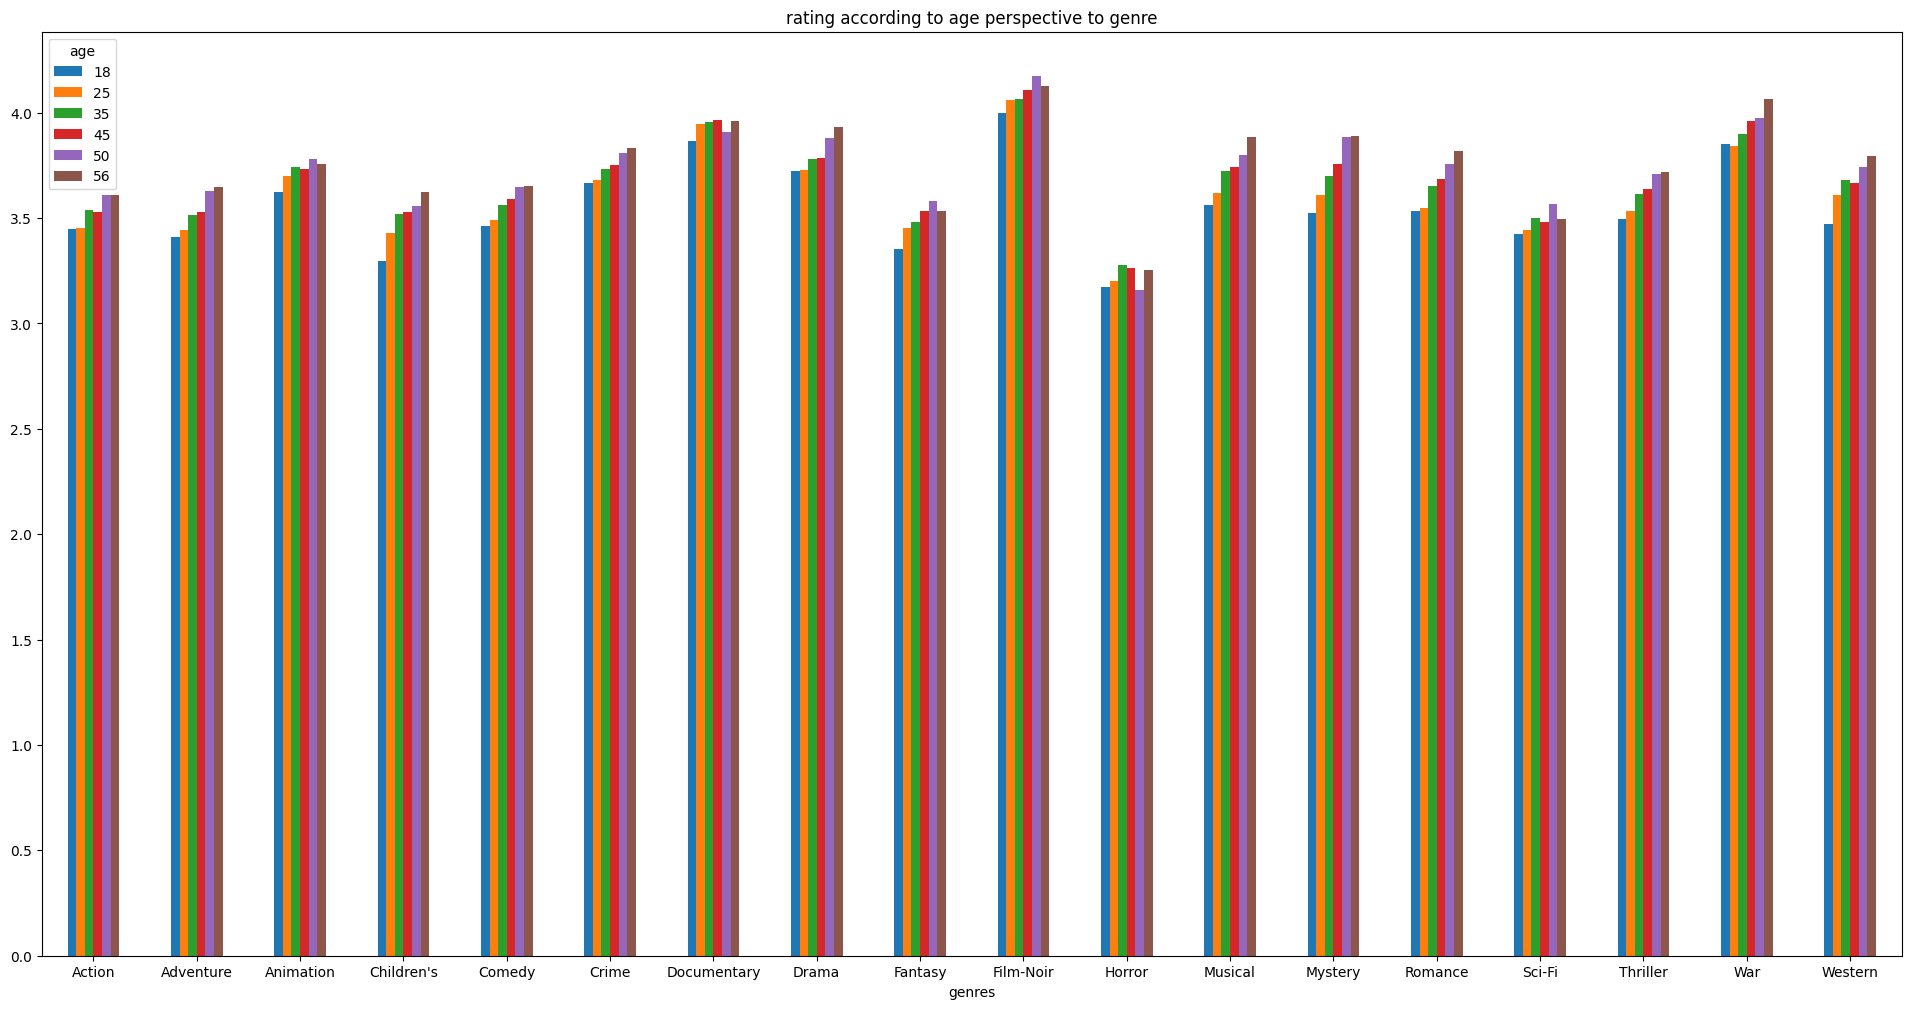

In [48]:
each_genre_ratings_top10.plot(kind="bar",figsize=(24,12),rot=0,title="rating according to age perspective to genre") 